# EDA Exercise

To see a completed version of this exercise, refer to [`examples/eda-exercise`](https://datasci.rice.edu/deep/curriculum/examples/eda-exercise/).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
plt.rcParams["figure.figsize"] = 10, 6
plt.rcParams["figure.dpi"] = 150

In [3]:
# https://www.cftc.gov/MarketReports/CommitmentsofTraders/HistoricalCompressed/index.htm
import requests, zipfile, io
import os.path

if not os.path.exists("../data/F_Disagg06_16.txt"):
    url = "https://www.cftc.gov/files/dea/history/fut_disagg_txt_hist_2006_2016.zip"

    r = requests.get(url)
    z = zipfile.ZipFile(io.BytesIO(r.content))
    z.extractall("../data")

In [4]:
# low_memory=False suppresses a mixed-type warning that can arise w/ messy data. We're not worried about performance right now, so not a big deal.
df = pd.read_csv("../data/F_Disagg06_16.txt", low_memory=False)
df.head()

,Market_and_Exchange_Names,As_of_Date_In_Form_YYMMDD,Report_Date_as_YYYY-MM-DD,CFTC_Contract_Market_Code,CFTC_Market_Code,CFTC_Region_Code,CFTC_Commodity_Code,Open_Interest_All,Prod_Merc_Positions_Long_All,Prod_Merc_Positions_Short_All,...,Conc_Net_LE_4_TDR_Long_Other,Conc_Net_LE_4_TDR_Short_Other,Conc_Net_LE_8_TDR_Long_Other,Conc_Net_LE_8_TDR_Short_Other,Contract_Units,CFTC_Contract_Market_Code_Quotes,CFTC_Market_Code_Quotes,CFTC_Commodity_Code_Quotes,CFTC_SubGroup_Code,FutOnly_or_Combined
0,WHEAT-SRW - CHICAGO BOARD OF TRADE,161227,2016-12-27,001602,CBT,0,1,446777,77925,75382,...,23.7,18.5,35.4,29.0,"(CONTRACTS OF 5,000 BUSHELS)",001602,CBT,1,A10,FutOnly
1,WHEAT-SRW - CHICAGO BOARD OF TRADE,161220,2016-12-20,001602,CBT,0,1,447386,76390,70886,...,23.9,17.4,35.1,28.0,"(CONTRACTS OF 5,000 BUSHELS)",001602,CBT,1,A10,FutOnly
2,WHEAT-SRW - CHICAGO BOARD OF TRADE,161213,2016-12-13,001602,CBT,0,1,443306,72600,76785,...,24.6,17.3,34.8,27.6,"(CONTRACTS OF 5,000 BUSHELS)",001602,CBT,1,A10,FutOnly
3,WHEAT-SRW - CHICAGO BOARD OF TRADE,161206,2016-12-06,001602,CBT,0,1,436214,77532,61394,...,26.8,17.9,38.8,28.9,"(CONTRACTS OF 5,000 BUSHELS)",001602,CBT,1,A10,FutOnly
4,WHEAT-SRW - CHICAGO BOARD OF TRADE,161129,2016-11-29,001602,CBT,0,1,444341,77239,63334,...,29.1,16.2,39.5,27.3,"(CONTRACTS OF 5,000 BUSHELS)",001602,CBT,1,A10,FutOnly


## Structured EDA

### What features are in your dataset?

List of Columns:
https://www.cftc.gov/MarketReports/CommitmentsofTraders/HistoricalViewable/CFTC_023168.html

In [5]:
df.columns

Index(['Market_and_Exchange_Names', 'As_of_Date_In_Form_YYMMDD',
       'Report_Date_as_YYYY-MM-DD', 'CFTC_Contract_Market_Code',
       'CFTC_Market_Code', 'CFTC_Region_Code', 'CFTC_Commodity_Code',
       'Open_Interest_All', 'Prod_Merc_Positions_Long_All',
       'Prod_Merc_Positions_Short_All',
       ...
       'Conc_Net_LE_4_TDR_Long_Other', 'Conc_Net_LE_4_TDR_Short_Other',
       'Conc_Net_LE_8_TDR_Long_Other', 'Conc_Net_LE_8_TDR_Short_Other',
       'Contract_Units', 'CFTC_Contract_Market_Code_Quotes',
       'CFTC_Market_Code_Quotes', 'CFTC_Commodity_Code_Quotes',
       'CFTC_SubGroup_Code', 'FutOnly_or_Combined'],
      dtype='object', length=191)

Note that the dataset is in a "wide" format, as there are related fields that have values in the column name, e.g. "Conc...4" vs "Conc...8".  More info on data organization:  

* https://en.wikipedia.org/wiki/Wide_and_narrow_data
* https://vita.had.co.nz/papers/tidy-data.pdf

The most important columns seem to be the first several that appear, described as follows:
- **Market_and_Exchange_Names**: The name of the market & exchange of the good.
- **Report_Date_as_YYYY-MM-DD**: The date of the reported data
- **CFTC_Contract_Market_Code**: A code for a specific contract market
- **CFTC_Market_Code**: A code for a specific market (like CBT)
- **CFTC_Region_Code**: A code for the region of the market
- **CFTC_Commodity_Code**: A code (assigned by each market) for the commodity
- **Open_Interest_All**: The number of contracts that are still outstanding (have not expired or been fulfilled)

### What type is each feature?

In [6]:
df.dtypes

Market_and_Exchange_Names            object
As_of_Date_In_Form_YYMMDD             int64
Report_Date_as_YYYY-MM-DD            object
CFTC_Contract_Market_Code            object
CFTC_Market_Code                     object
CFTC_Region_Code                      int64
CFTC_Commodity_Code                   int64
Open_Interest_All                     int64
Prod_Merc_Positions_Long_All          int64
Prod_Merc_Positions_Short_All         int64
Swap_Positions_Long_All               int64
Swap__Positions_Short_All             int64
Swap__Positions_Spread_All            int64
M_Money_Positions_Long_All            int64
M_Money_Positions_Short_All           int64
M_Money_Positions_Spread_All          int64
Other_Rept_Positions_Long_All         int64
Other_Rept_Positions_Short_All        int64
Other_Rept_Positions_Spread_All       int64
Tot_Rept_Positions_Long_All           int64
Tot_Rept_Positions_Short_All          int64
NonRept_Positions_Long_All            int64
NonRept_Positions_Short_All     

### Distribution of each feature?

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11b6db780>]],
      dtype=object)

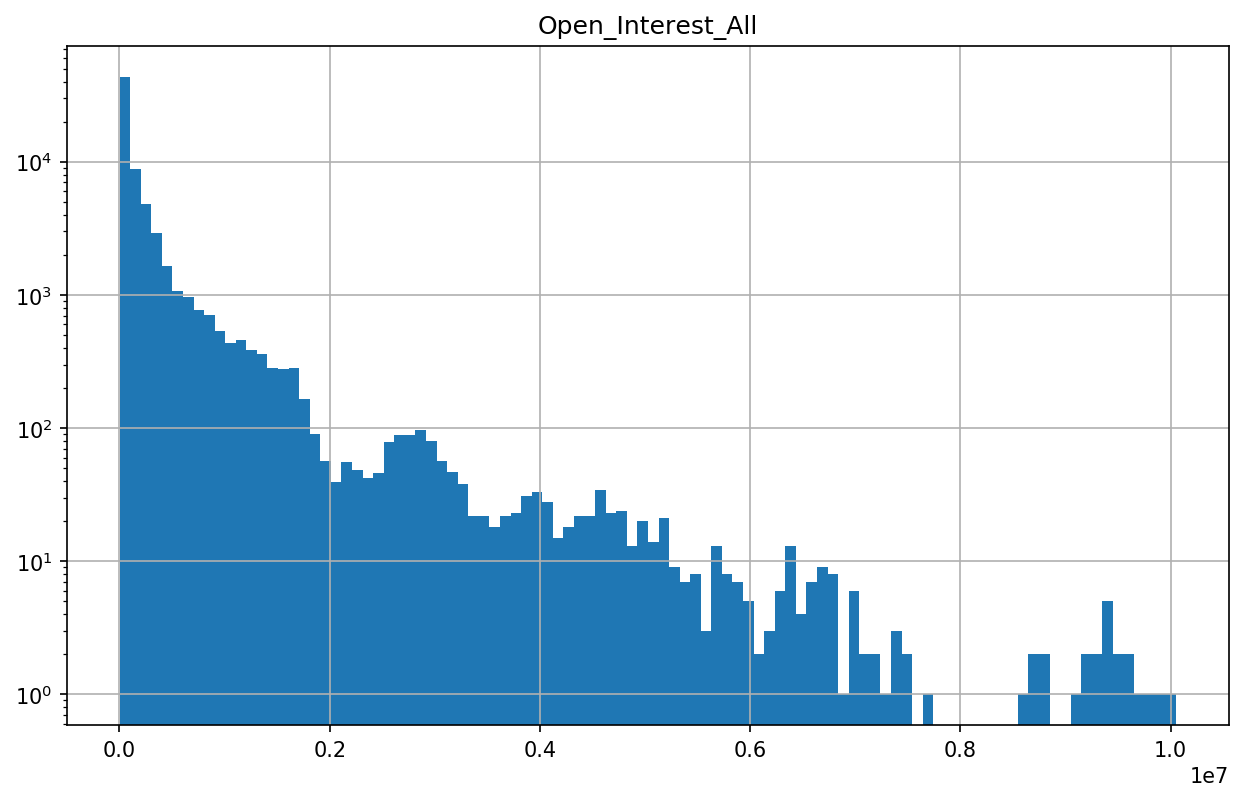

In [7]:
# Distribution of open interest accross all markets, all contracts
df.hist(column='Open_Interest_All', bins=100, log=True)

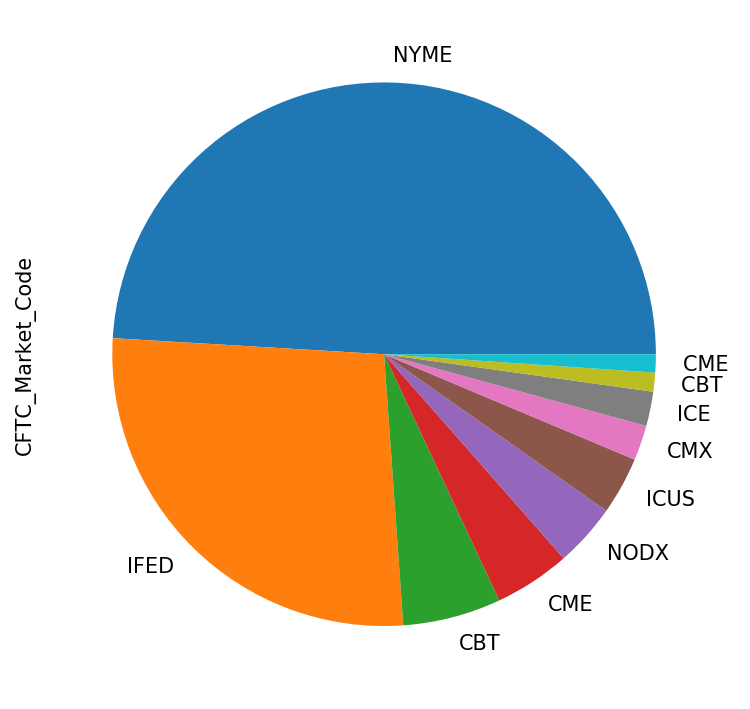

In [8]:
# Top 10 Markets in terms of reported data count
df['CFTC_Market_Code'].value_counts()[:10].plot.pie()

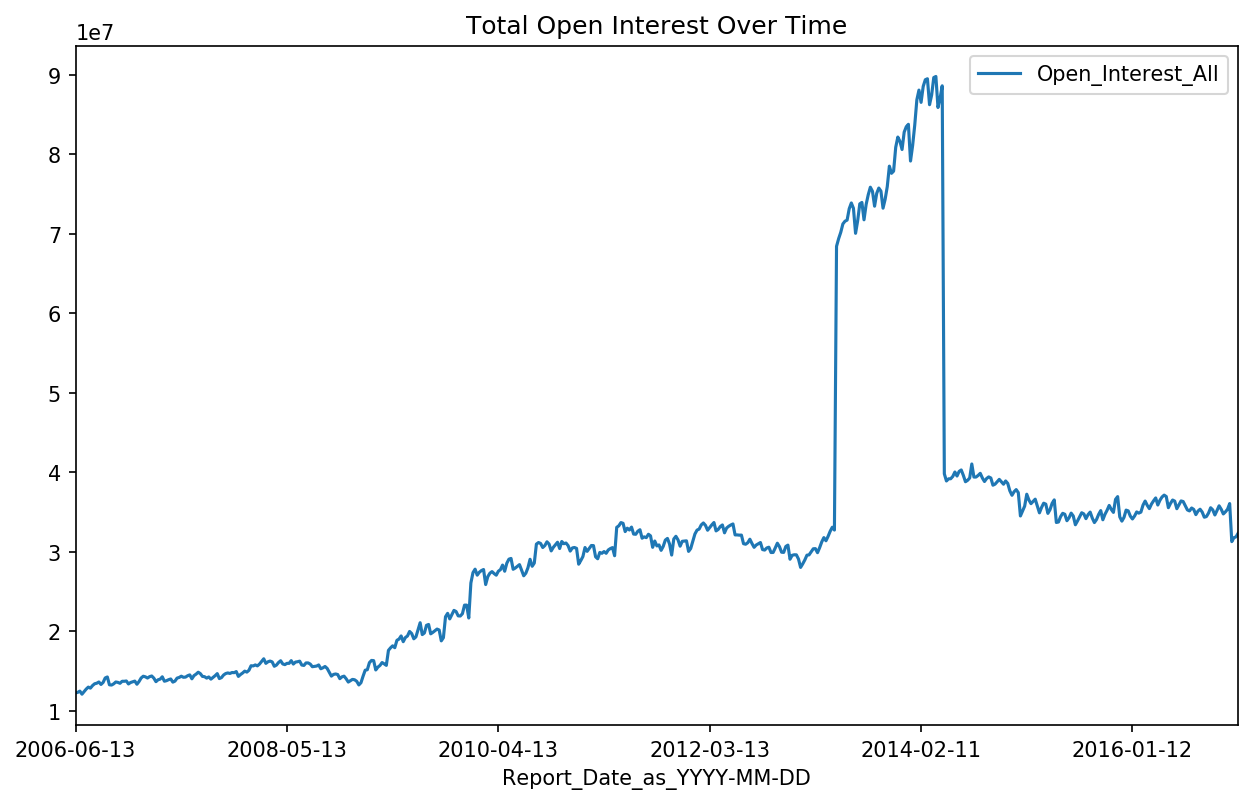

In [9]:
sorted_data = df.sort_values('Report_Date_as_YYYY-MM-DD')
grouped_data = sorted_data.groupby('Report_Date_as_YYYY-MM-DD')
grouped_data['Open_Interest_All'].sum().plot(title="Total Open Interest Over Time",legend=True)

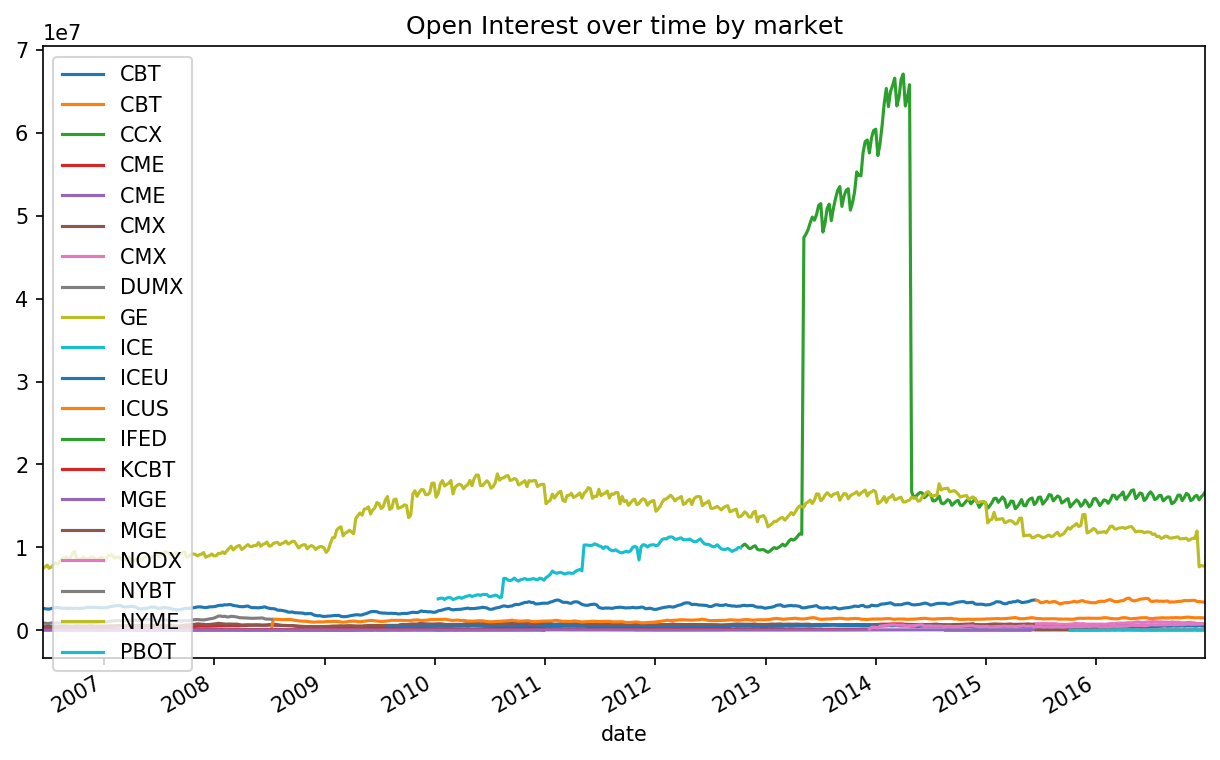

In [10]:
# Plot by market
df['date'] = pd.to_datetime(df['Report_Date_as_YYYY-MM-DD'])
sorted_data = df.sort_values('date')
grouped_data = sorted_data.groupby(['CFTC_Market_Code','date'])['Open_Interest_All'].sum()
data = grouped_data.reset_index('date')
for market in data.index.unique():
    ax = data.loc[market].plot(title='Open Interest over time by market', x='date', y='Open_Interest_All', ax=plt.gca(), label=market)

### What do the numeric features represent? Counts? Measurements?

Open_Interest_All is a count of standing contracts

### What are the pairwise relationships between numeric features?

That is not very clear at this point.

## Brainstorming

Let's take a step back and connect your dataset to its real-world context.  

Consider what these features and values actually represent.  Is there anything unexpected about the features?  What biases or thoughts did you have about this topic before exploring the data?  List off some "facts" that you think are true about your topic.  Our goal in EDA is to reconcile your perspective of the data / topic with the *truth* of the dataset.  What motivated you to choose this dataset?  What insights or questions are you investigating with this dataset?  Now that you've explored each of the features, which might be useful to you in your investigation?

A significant majority of the data is from three markets:
1. NYME: New York Mercantile Exchange
2. IFED: ICE Futures U.S. Energy Division
3. CBT: Chicago Board of Trade
This order was surprising to see because I thought CBT was the largest commodities exchange, but at least in terms of the raw volume of data we have on each that doesn't appear to be true.

Also the graph of open interest shows a period of time from 2013-2014 with a large sudden increase in open interest, which then suddenly drops off. That will need to be explained/understood at some point.

We chose this dataset to learn about finance and the futures market. It seems like looking at open interest will be the most interesting way to go, particularly looking at open interest over time, in different markets/regions, and for different commodities or types of commodities will be the most interesting.

## Open-Ended EDA

EDA is an iterative process.  It begins with answering initial questions which lead to more questions.  Using some of the brainstorming above, come up with at least one concrete investigation into your dataset.  This might be inspecting a specific irregularity, questioning a personal bias, or identifying a specific relationship between two features.  

To do this, you'll likely need to select a subset of your dataset, transform it into a simpler format, and finally visualize or summarize it.  Visualizations are **highly** encouraged at this point!  It's much easier to understand relationships visually.